## Transformation notebook - MORPH1:
Use this notebook and the functions in `image_analysis.py` and `satellite_analysis.py` to rotate and rescale the .tif files to match the water classification binary data.

In [1]:
# Load necessary functions and packages
from images_analysis import *
from satellite_analysis_pre import *
import numpy as np
import rasterio as rio


g:\Landsat_river\ndvi_final\output_NDVI\satellite_analysis_pre.py:63: SyntaxWarning: invalid escape sequence '\s'
  '''
g:\Landsat_river\ndvi_final\output_NDVI\satellite_analysis_pre.py:114: SyntaxWarning: invalid escape sequence '\s'
  '''
g:\Landsat_river\ndvi_final\output_NDVI\satellite_analysis_pre.py:306: SyntaxWarning: invalid escape sequence '\s'
  '''
g:\Landsat_river\ndvi_final\output_NDVI\satellite_analysis_pre.py:395: SyntaxWarning: invalid escape sequence '\s'
  '''
g:\Landsat_river\ndvi_final\output_NDVI\satellite_analysis_pre.py:435: SyntaxWarning: invalid escape sequence '\s'
  '''
g:\Landsat_river\ndvi_final\output_NDVI\satellite_analysis_pre.py:485: SyntaxWarning: invalid escape sequence '\s'
  ''''


### Set-up additional functions and test the functions

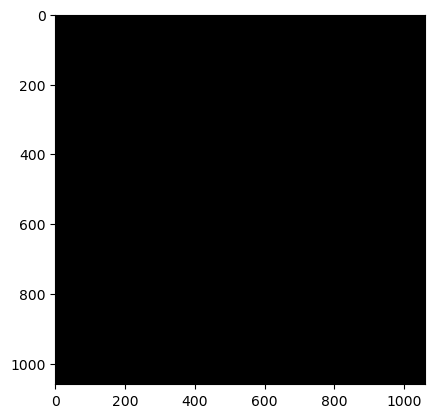

In [7]:
# Import single image for test:
from PIL import Image
im = Image.open('training_r14/1990_training_r14.tif')
plt.imshow(im)

In [8]:
# Check if the function to get angle rotation works:
get_angle_rotation(im)

45

In [9]:
# Check whether rotation function works:
rotate_images(im)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
# Function to get all the .tif file paths in the folder
def get_all_file_paths(folder_path):
    """
    Get all .tif file paths within a folder, including those in subdirectories.
    
    :param folder_path: Path to the folder
    :return: A list of .tif file paths within the folder
    """
    file_paths = []
    
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.tif'):  # Check if the file has a .tif extension
                file_paths.append(os.path.join(root, file))
    
    return file_paths

# Check whether it works
folder = "G:\Landsat_river\ndvi_final\output_NDVI" 
files = get_all_file_paths(folder)
print(files)

<>:17: SyntaxWarning: invalid escape sequence '\L'
<>:17: SyntaxWarning: invalid escape sequence '\L'
C:\Users\ducnh\AppData\Local\Temp\ipykernel_31096\2675402189.py:17: SyntaxWarning: invalid escape sequence '\L'
  folder = "G:\Landsat_river\ndvi_final\output_NDVI"  # Replace with the folder path


In [22]:
# Testing cell for algorithm, disable if needed
preprocess_images('training_r14\\1994_training_r14.tif', desired_shape=(1000, 500),  reshape_img=True, new_padded_class=None, 
            input_f='training_r14', 
            output_f='preprocessed_training_r14')

In [30]:
# Initialise empty folders for paths
folder_path = []    # Stores list of all the folder paths
file_paths = []     # Stores lists of all .tif file paths

# Collect folder names and file paths
for i in range(1, 29):
    folder_name = f'training_r{i}'
    folder_path.append(folder_name)
    file_paths.append(get_all_file_paths(folder_name))  # Collect all files in the folder

# Process each file
for i in range(0, 28):  # Matches the 28 folders (adjusted for 0-based index)
    for file_path in file_paths[i]:  # Iterates over each file in the current folder
        preprocess_images(
            input_path=file_path, 
            desired_shape=(1000, 500), 
            reshape_img=True, 
            new_padded_class=None, 
            input_f=folder_path[i], 
            output_f=f'postprocess_training_r{i+1}'  # Use i+1 to keep the folder naming consistent
        )

In [28]:
file_paths

[['training_r1\\2007_training_r1.tif',
  'training_r1\\2008_training_r1.tif',
  'training_r1\\1991_training_r1.tif',
  'training_r1\\1988_training_r1.tif',
  'training_r1\\2011_training_r1.tif',
  'training_r1\\2016_training_r1.tif',
  'training_r1\\1996_training_r1.tif',
  'training_r1\\1999_training_r1.tif',
  'training_r1\\2000_training_r1.tif',
  'training_r1\\2019_training_r1.tif',
  'training_r1\\2017_training_r1.tif',
  'training_r1\\1997_training_r1.tif',
  'training_r1\\2001_training_r1.tif',
  'training_r1\\1998_training_r1.tif',
  'training_r1\\2018_training_r1.tif',
  'training_r1\\2006_training_r1.tif',
  'training_r1\\1990_training_r1.tif',
  'training_r1\\2009_training_r1.tif',
  'training_r1\\2010_training_r1.tif',
  'training_r1\\1989_training_r1.tif',
  'training_r1\\1995_training_r1.tif',
  'training_r1\\2015_training_r1.tif',
  'training_r1\\2003_training_r1.tif',
  'training_r1\\2004_training_r1.tif',
  'training_r1\\2020_training_r1.tif',
  'training_r1\\2012_trai